In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load https://api.coinmarketcap.com/v1/ticker/?limit=0 into a DataFrame named df using read_json() from pandas.
path = 'https://api.coinmarketcap.com/v1/ticker/?limit=0'
df = pd.read_json(path)

df.head()

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,5.650980e+09,17449487,bitcoin,1546028544,68543998468,2.100000e+07,Bitcoin,-0.60,6.50,-0.46,1.000000,3928.138315,1,BTC,17449487
1,8.101865e+08,40794121066,ripple,1546028524,15318921018,1.000000e+11,XRP,-0.77,6.82,3.66,0.000096,0.375518,2,XRP,99991738974
2,3.077113e+09,104064011,ethereum,1546028537,14051805566,NaN,Ethereum,-1.33,13.80,21.86,0.034344,135.030405,3,ETH,104064011
3,4.839237e+08,17536000,bitcoin-cash,1546028532,3021947867,2.100000e+07,Bitcoin Cash,-2.09,12.18,-9.39,0.043831,172.328231,4,BCH,17536000
4,9.200758e+08,906245118,eos,1546028532,2429563446,NaN,EOS,-0.30,12.75,2.24,0.000682,2.680912,5,EOS,1006245120


In [3]:
# Select the columns id and market_cap_usd
market_cap_raw = df.loc[:,['id','market_cap_usd']]

market_cap_raw.head()

,id,market_cap_usd
0,bitcoin,68543998468
1,ripple,15318921018
2,ethereum,14051805566
3,bitcoin-cash,3021947867
4,eos,2429563446


In [4]:
print(market_cap_raw.count())

# filter out all coins with no market cap
cap = market_cap_raw.query('market_cap_usd > 0')

print(cap.count())

id                100
market_cap_usd    100
dtype: int64
id                100
market_cap_usd    100
dtype: int64


In [5]:
# cap10 == first 10 coins w/ id as index
cap10 = cap.head(10).set_index('id')
cap10

,market_cap_usd
id,
bitcoin,68543998468
ripple,15318921018
ethereum,14051805566
bitcoin-cash,3021947867
eos,2429563446
stellar,2332686418
litecoin,1947313596
tether,1911409635
bitcoin-sv,1634988359


In [6]:
# Calculate the percentage of market capitalization
cap10 = cap10.assign(market_cap_perc =
    lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

cap10.head()

,market_cap_usd,market_cap_perc
id,,
bitcoin,68543998468,53.907528
ripple,15318921018,12.047811
ethereum,14051805566,11.051268
bitcoin-cash,3021947867,2.376659
eos,2429563446,1.910769


Text(0, 0.5, '% of total cap')

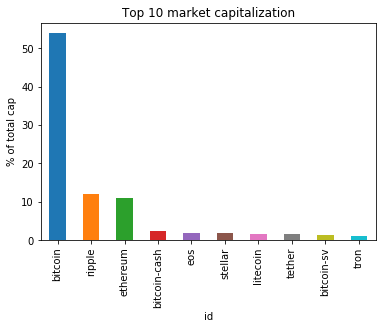

In [7]:
# Plot market_cap_perc
xy = cap10['market_cap_perc'].plot.bar(title='Top 10 market capitalization')

xy.set_ylabel('% of total cap')

Text(0.5, 0, '')

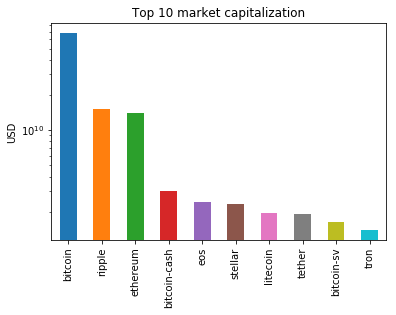

In [8]:
# Plot market_cap_usd with log scaled y-axis  
xy = cap10['market_cap_usd'].plot.bar(title='Top 10 market capitalization')
xy.set_yscale('log')
xy.set_ylabel('USD')
xy.set_xlabel('') # xlabel is not very informative

In [9]:
# volatility DataFrame == id, percent_change_24h and percent_change_7d columns
volatility = df.loc[:,['id', 'percent_change_24h', 'percent_change_7d']]

# set the index to id and drop all NAs
volatility = volatility.set_index('id').dropna()

# sort volatility by percent_change_24h
volatility = volatility.sort_values('percent_change_24h', ascending=True)


volatility.head()

,percent_change_24h,percent_change_7d
id,,
odem,-8.25,40.39
qash,-6.56,-23.03
dentacoin,-2.47,-9.88
usd-coin,-0.78,-0.17
trueusd,-0.58,-0.13


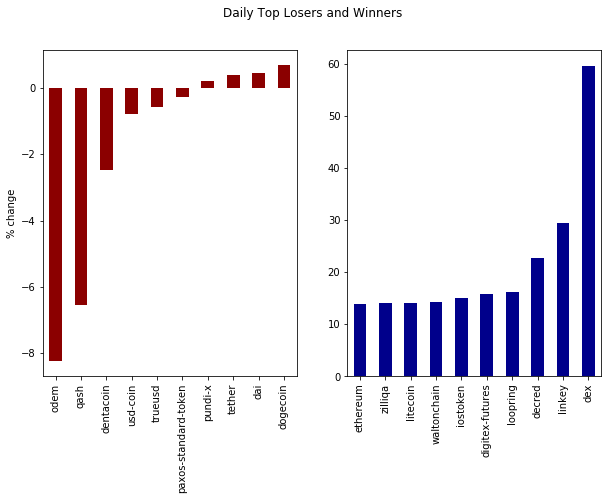

In [10]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    
    """The function assumes that volatility_series is sorted
    volatility_series[:10] will return the top 10 losers
    and volatility_series[-10:] will return the top 10 winners."""
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    xy = (volatility_series[:10].plot.bar(color="darkred", ax=axes[0]))
    
    fig.suptitle(title)
    
    xy.set_ylabel('% change')
    xy.set_xlabel('')
    
    xy = (volatility_series[-10:].plot.bar(color='darkblue', ax=axes[1]))
    xy.set_xlabel('')
    
    return fig, xy

TITLE = "Daily Top Losers and Winners"

fig, xy = top10_subplot(volatility.percent_change_24h, TITLE)

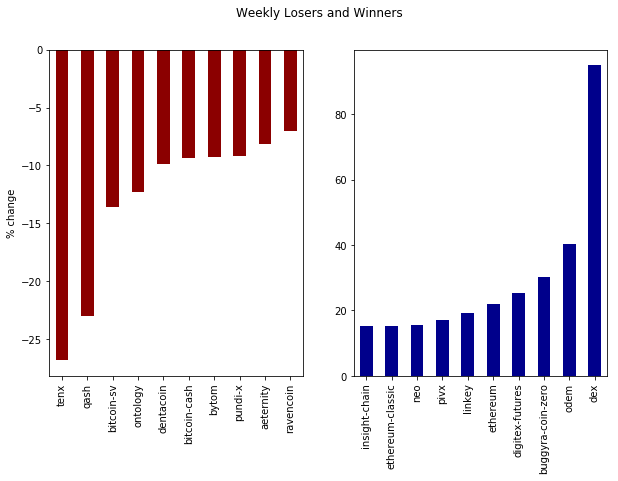

In [11]:
# Sort volatility by percent_change_7d
volatility7d = volatility.sort_values('percent_change_7d', ascending=True)

TITLE = 'Weekly Losers and Winners'
fig, xy = top10_subplot(volatility7d.percent_change_7d, TITLE)

In [12]:
# select all "large cap" coins in cap. large cap stocks have a market_cap_usd > +10 billion USD
largecaps = cap.query('market_cap_usd > 10000000000')

print(largecaps)

         id  market_cap_usd
0   bitcoin     68543998468
1    ripple     15318921018
2  ethereum     14051805566


In [13]:
# Market cap definitions from Investopedia:

# Large cap: +10 billion
# Mid cap: 2 billion - 10 billion
# Small cap: 300 million - 2 billion
# Micro cap: 50 million - 300 million
# Nano cap: Below 50 million

Text(0, 0.5, 'Billions (USD)')

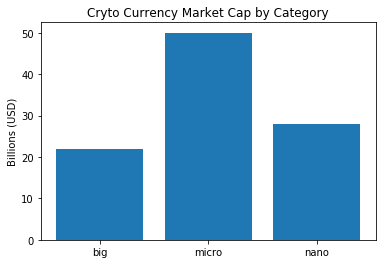

In [14]:
def capcount(query):
    """This function counts the different marketcaps of cap DataFrame
    .query() takes a string
    function returns an integer"""
    return cap.query(query).count().id

LABELS = ["big", "micro", "nano"]

q_big = 'market_cap_usd > 300000000'
big = capcount(q_big)

q_micro = '300000000 > market_cap_usd > 50000000'
micro = capcount(q_micro)

q_nano = 'market_cap_usd < 50000000'
nano =  capcount(q_nano)

VALUES = [big, micro, nano]

# plot 
plt.bar(range(len(VALUES)), VALUES, tick_label=LABELS)
plt.title('Cryto Currency Market Cap by Category')
plt.ylabel('Billions (USD)')

In [15]:
# query() the DataFrame and filter out all the micro and nano-cap cryptocurrencies  
# save DataFrame of "big" cap cryptos as big_cap
big_cap = df.query('market_cap_usd > 300000000')

# view big_cap
print(big_cap.count())
big_cap.head()

24h_volume_usd        22
available_supply      22
id                    22
last_updated          22
market_cap_usd        22
max_supply             9
name                  22
percent_change_1h     22
percent_change_24h    22
percent_change_7d     22
price_btc             22
price_usd             22
rank                  22
symbol                22
total_supply          22
dtype: int64


,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,5.650980e+09,17449487,bitcoin,1546028544,68543998468,2.100000e+07,Bitcoin,-0.60,6.50,-0.46,1.000000,3928.138315,1,BTC,17449487
1,8.101865e+08,40794121066,ripple,1546028524,15318921018,1.000000e+11,XRP,-0.77,6.82,3.66,0.000096,0.375518,2,XRP,99991738974
2,3.077113e+09,104064011,ethereum,1546028537,14051805566,NaN,Ethereum,-1.33,13.80,21.86,0.034344,135.030405,3,ETH,104064011
3,4.839237e+08,17536000,bitcoin-cash,1546028532,3021947867,2.100000e+07,Bitcoin Cash,-2.09,12.18,-9.39,0.043831,172.328231,4,BCH,17536000
4,9.200758e+08,906245118,eos,1546028532,2429563446,NaN,EOS,-0.30,12.75,2.24,0.000682,2.680912,5,EOS,1006245120


In [16]:
# Create a DataFrame that contains volatility information on cryptocurrencies.

# Selecting the id, percent_change_24h and percent_change_7d columns
big_cap_v = big_cap.loc[:,['id', 'percent_change_24h', 'percent_change_7d']]

# Set the index to id and drop all rows that contain NaNs.
big_cap_v = big_cap_v.set_index('id').dropna()

#Sort volatility by percent_change_24h in ascending order.
big_cap_v_24h = big_cap_v.sort_values('percent_change_24h', ascending=True)

# view the .head() of volatility
big_cap_v.head()

,percent_change_24h,percent_change_7d
id,,
bitcoin,6.50,-0.46
ripple,6.82,3.66
ethereum,13.80,21.86
bitcoin-cash,12.18,-9.39
eos,12.75,2.24


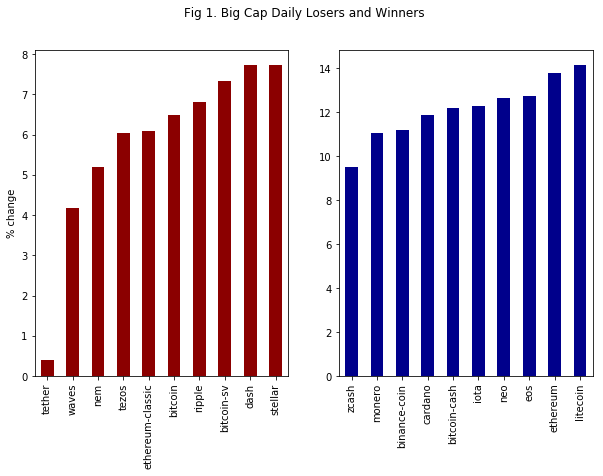

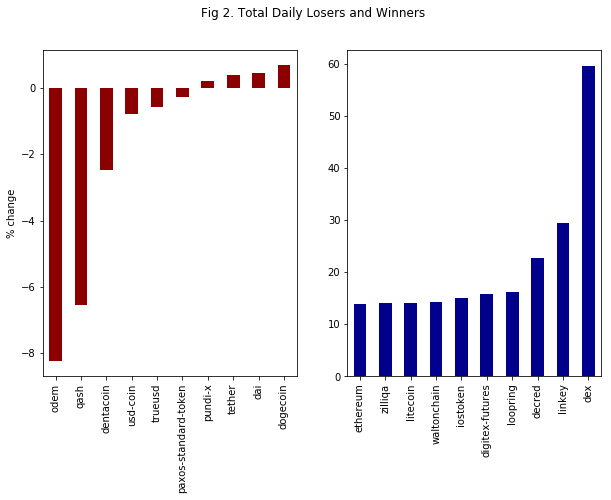

In [17]:
# 

TITLE24h1 = 'Fig 1. Big Cap Daily Losers and Winners'
TITLE24h2 = 'Fig 2. Total Daily Losers and Winners'

#
fig, xy = top10_subplot(big_cap_v_24h.percent_change_24h, TITLE24h1)
fig, xy = top10_subplot(volatility.percent_change_24h, TITLE24h2)

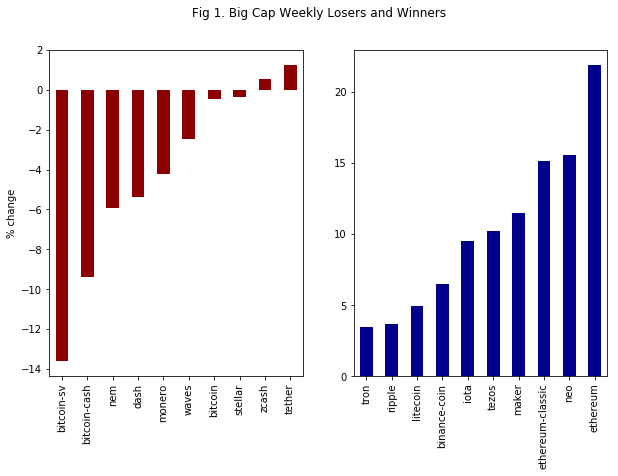

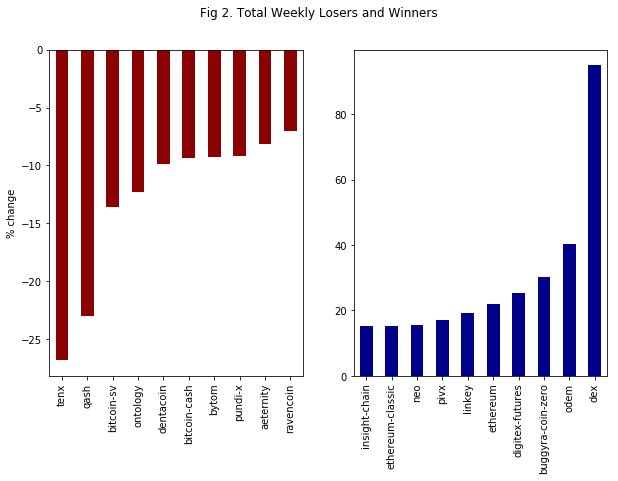

In [18]:
#

#Sort volatility by percent_change_24h in ascending order.
big_cap_v_7d = big_cap_v.sort_values('percent_change_7d', ascending=True)

TITLEw1 = 'Fig 1. Big Cap Weekly Losers and Winners'
TITLEw2 = 'Fig 2. Total Weekly Losers and Winners'

#
fig, xy = top10_subplot(big_cap_v_7d.percent_change_7d, TITLEw1)
fig, xy = top10_subplot(volatility7d.percent_change_7d, TITLEw2)